```
                                Implementation of Adaline algorithm
```

### Paper link: [Adaline algorithm](http://www-isl.stanford.edu/~widrow/papers/c1992artificialneural.pdf)


Wikipedia:



![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Adaline_flow_chart.gif/250px-Adaline_flow_chart.gif)

## Source: [Wikipedia](https://en.wikipedia.org/wiki/ADALINE)

ADALINE (Adaptive Linear Neuron or later Adaptive Linear Element) is an early single-layer artificial neural network and the name of the physical device that implemented this network. The network uses memistors. It was developed by Professor Bernard Widrow and his graduate student Ted Hoff at Stanford University in 1960. It is based on the McCulloch–Pitts neuron. It consists of a weight, a bias and a summation function.

The difference between Adaline and the standard (McCulloch–Pitts) perceptron is that in the learning phase, the weights are adjusted according to the weighted sum of the inputs (the net). In the standard perceptron, the net is passed to the activation (transfer) function and the function's output is used for adjusting the weights.

A multilayer network of ADALINE units is known as a MADALINE.



Adaline is a single layer neural network with multiple nodes where each node accepts multiple inputs and generates one output. Given the following variables:as

* x is the input vector
* w is the weight vector
* n is the number of inputs
* $\theta$  some constant
* y is the output of the model

then we find that the output is  ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/48e84e761e6696012593e3383fd6be71bf12a466) If we further assume that ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/3cab253733ec3244c1cfbd256927e69a0847d890)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/bada3fb9aabff9add0f341cca7465cf76414811e)

then the output further reduces to: 
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/aba8199d361bd4c31388d9b69a3099cbcb1e0dcc)

## Learning algorithm

Let us assume:

* $ \eta$  is the learning rate (some positive constant)
* y is the output of the model
* o is the target (desired) output
then the weights are updated as follows $ w\leftarrow w+\eta (o-y)x $. The ADALINE converges to the least squares error which is $  E=(o-y)^{2} $ This update rule is in fact the stochastic gradient descent update for linear regression.

## Perceptron vs Adaline



The perceptron surely was very popular at the time of its discovery, however, it only took a few years until Bernard Widrow and his doctoral student Tedd Hoff proposed the idea of the Adaptive Linear Neuron (adaline) [3].

In contrast to the perceptron rule, the delta rule of the adaline (also known as Widrow-Hoff” rule or Adaline rule) updates the weights based on a linear activation function rather than a unit step function; here, this linear activation function g(z) is just the identity function of the net input $ g(w^Tx)=w^Tx $. In the next section, we will see why this linear activation is an improvement over the perceptron update and where the name “delta rule” comes from.

In [3]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import pandas as pd


In [4]:

class Perceptron:
    
    
    def __init__(self , lr = 0.001 , epochs = 50):
        self.lr = lr
        self.epochs = epochs
        
            
    def train(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        
        for _ in range(self.epochs):
            errors = 0
            for xi , target in zip(X , y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self , X):
        return np.dot(X, self.w_[1:]) + self.w_[0]    
    
    def predict(self , X):
        return np.where(self.net_input(X) >= 0.0 , 1 , 0) # check for this
        
        

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

Weights: [-15.7  -45.3   71.84]


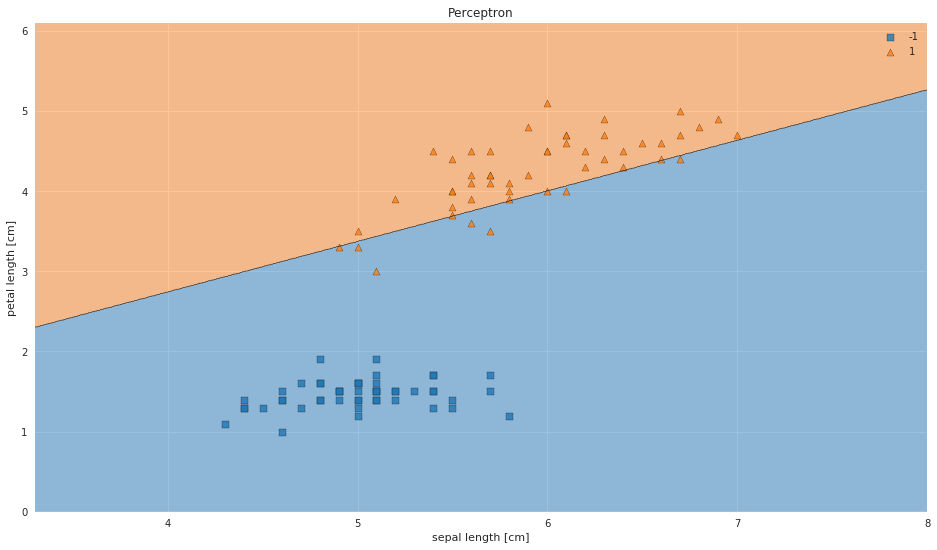

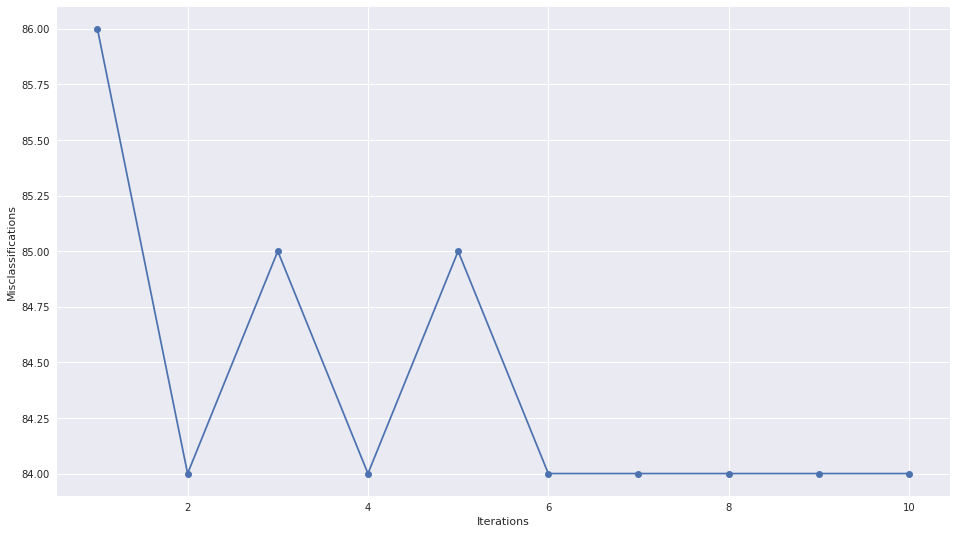

In [18]:
from mlxtend.plotting import plot_decision_regions

ppn = Perceptron(epochs=10, lr=0.1)

ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()


### Problems with Perceptrons
Although the perceptron classified the two Iris flower classes perfectly, convergence is one of the biggest problems of the perceptron. Frank Rosenblatt proofed mathematically that the perceptron learning rule converges if the two classes can be separated by linear hyperplane, but problems arise if the classes cannot be separated perfectly by a linear classifier. To demonstrate this issue, we will use two different classes and features from the Iris dataset.

/home/konstantinos/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


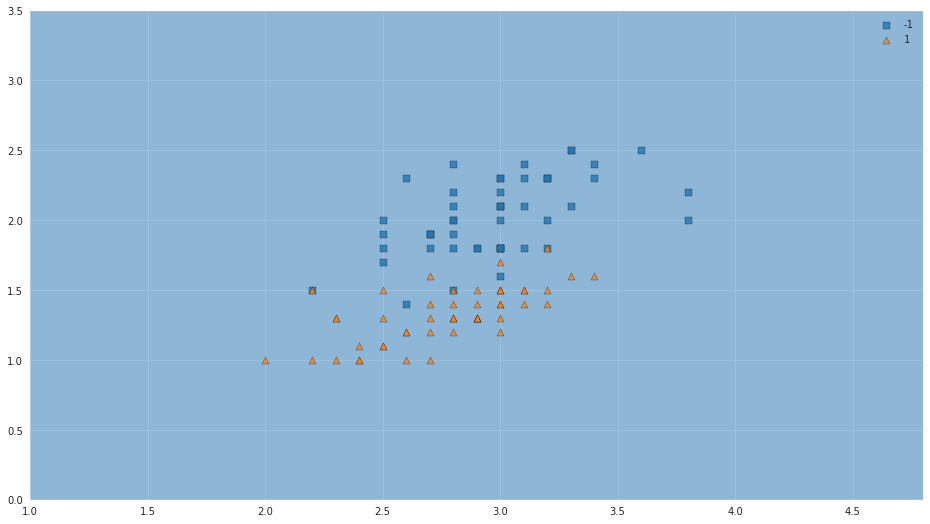

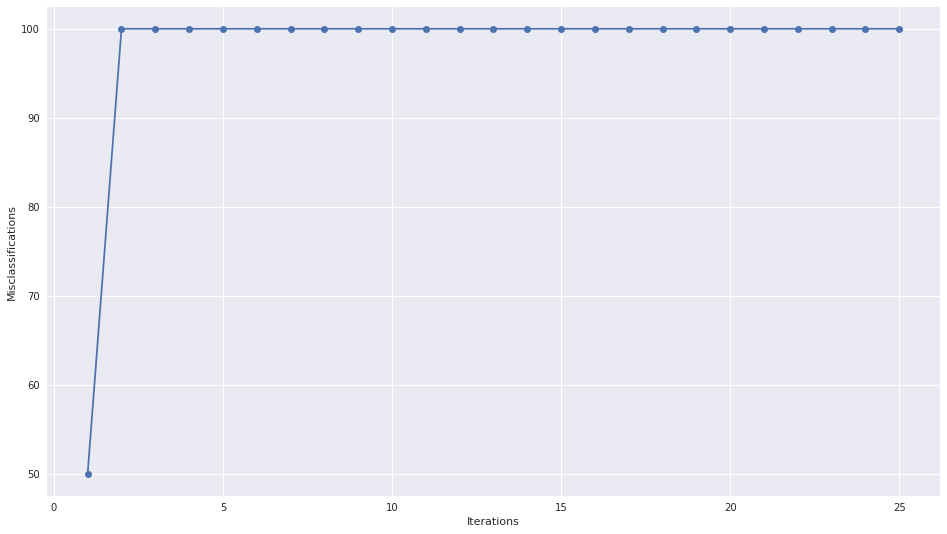

In [20]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)

# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values

ppn = Perceptron(epochs=25, lr=0.01)
ppn.train(X2, y2)

plot_decision_regions(X2, y2, clf=ppn)
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [21]:
print('Total number of misclassifications: %d of 100' % (y2 != ppn.predict(X2)).sum())

Total number of misclassifications: 100 of 100


### Even at a lower training rate, the perceptron failed to find a good decision boundary since one or more samples will always be misclassified in every epoch so that the learning rule never stops updating the weights.

### It may seem paradoxical in this context that another shortcoming of the perceptron algorithm is that it stops updating the weights as soon as all samples are classified correctly. Our intuition tells us that a decision boundary with a large margin between the classes (as indicated by the dashed line in the figure below) likely has a better generalization error than the decision boundary of the perceptron. But large-margin classifiers such as Support Vector Machines are a topic for another time.

![](http://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_vs_adaline.png)

In [2]:
plt.rcParams['figure.figsize']= (16,9)
sns.set()

In [3]:
# Download Dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.isnull().sum().sum())
y = df.iloc[0:100 , 4].values
y = np.where(y == 'Iris-setosa' , -1 , 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values


0


In [4]:
print(X.shape,y.shape)

(100, 2) (100,)


In [5]:
class AdalineGD:
    
    
    def __init__(self, lr = 0.01, epochs = 50):
        self.lr = lr
        self.epochs = epochs
      
    
    def train(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        
        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.lr * X.T.dot(errors)
            self.w_[0]  += self.lr * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            
        return self
        
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]


    def activation(self, X):
        return self.net_input(X)
    
    
    def predict(self, X):
        return np.where(self.activation(X) > 0.0 , 1, -1)


In [6]:
ada = AdalineGD(epochs =10 , lr = 0.01).train(X , y)

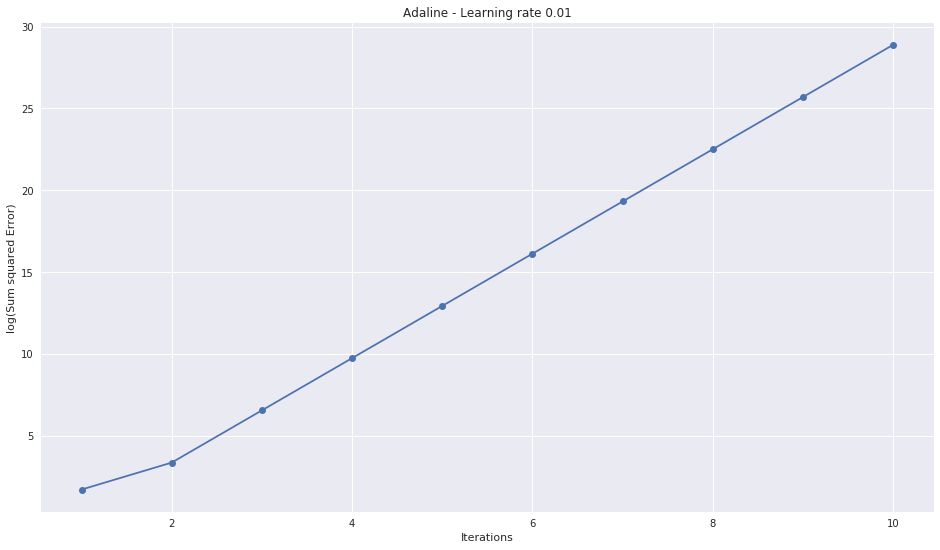

In [7]:

plt.plot(range(1,len(ada.cost_) +1 ), np.log10(ada.cost_), marker = 'o')
plt.xlabel("Iterations")
plt.ylabel("log(Sum squared Error)")
plt.title('Adaline - Learning rate 0.01')
plt.show()

In [8]:
ada = AdalineGD(epochs = 10 , lr = 0.00001 ).train(X ,y)

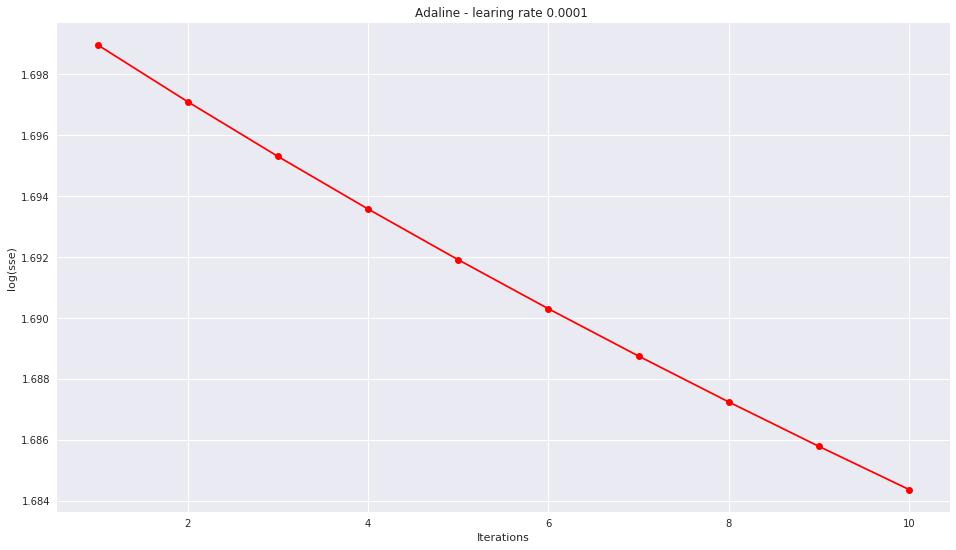

In [9]:

plt.plot(range(1,len(ada.cost_) + 1), np.log10(ada.cost_) ,color='red', marker = 'o')
plt.xlabel("Iterations")
plt.ylabel("log(sse)")
plt.title("Adaline - learing rate 0.0001 ")
plt.show()

## The two plots above nicely emphasize the importance of plotting learning curves by illustrating two most common problems with gradient descent:

* If the learning rate is too large, gradient descent will overshoot the minima and diverge.
* If the learning rate is too small, the algorithm will require too many epochs to converge and can become trapped in local minima more easily.



![](http://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_learning_rate.png)


Gradient descent is also a good example why feature scaling is important for many machine learning algorithms. It is not only easier to find an appropriate learning rate if the features are on the same scale, but it also often leads to faster convergence and can prevent the weights from becoming too small (numerical stability).

A common way of feature scaling is standardization


$$x_{j,std} = \frac{x_j - \mu_j}{\sigma_j} $$

where $ \mu_j $ is the sample mean of the feature $x_j$ and σj the standard deviation, respectively. After standardization, the features will have unit variance and are centered around mean zero.

In [9]:
# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

### Online Learning via Stochastic Gradient Descent
The previous section was all about “batch” gradient descent learning. The “batch” updates refers to the fact that the cost function is minimized based on the complete training data set. If we think back to the perceptron rule, we remember that it performed the weight update incrementally after each individual training sample. This approach is also called “online” learning, and in fact, this is also how Adaline was first described by Bernard Widrow et al. [3]

The process of incrementally updating the weights is also called “stochastic” gradient descent since it approximates the minimization of the cost function. Although the stochastic gradient descent approach might sound inferior to gradient descent due its “stochastic” nature and the “approximated” direction (gradient), it can have certain advantages in practice. Often, stochastic gradient descent converges much faster than gradient descent since the updates are applied immediately after each training sample; stochastic gradient descent is computationally more efficient, especially for very large datasets. Another advantage of online learning is that the classifier can be immediately updated as new training data arrives, e.g., in web applications, and old training data can be discarded if storage is an issue. In large-scale machine learning systems, it is also common practice to use so-called “mini-batches”, a compromise with smoother convergence than stochastic gradient descent.

In the interests of completeness let us also implement the stochastic gradient descent Adaline and confirm that it converges on the linearly separable iris dataset.

In [6]:
class AdalineSGD:
    
    def __init__(self, lr =0.0001, epochs = 40):
        self.lr = lr
        self.epochs = epochs
        
        
        
    def train(self , X , y , reinitialize_weights = True):
        
        if reinitialize_weights:
            self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        
        for i in range(self.epochs):
            for xi , target in zip(X , y):
                output = self.net_input(xi)
                error = (target - output)
                self.w_[1:] += self.lr * xi.dot(error)
                self.w_[0] += self.lr * error
                
                
            cost = ((y - self.activation(X)) ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
            
    def net_input(self , X):
        return np.dot(X , self.w_[1:]) + self.w_[0]
    
    
    
    def activation(self , X):
        return self.net_input(X)
        
    def predict(self , X):
        return np.where(self.activation(X) >= 0.0 , 1, -1)
    

One more advice before we let the adaline learn via stochastic gradient descent is to shuffle the training dataset to iterate over the training samples in random order.

We shall note that the “standard” stochastic gradient descent algorithm uses sampling “with replacement,” which means that at each iteration, a training sample is chosen randomly from the entire training set. In contrast, sampling “without replacement,” which means that each training sample is evaluated exactly once in every epoch, is not only easier to implement but also shows a better performance in empirical comparisons. A more detailed discussion about this topic can be found in Benjamin Recht and Christopher Re’s paper Beneath the valley of the noncommutative arithmetic-geometric mean inequality: conjectures, case-studies, and consequences

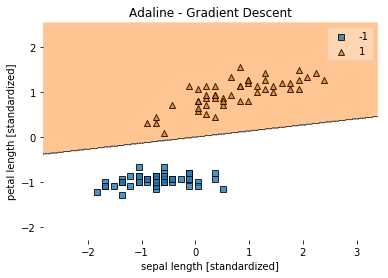

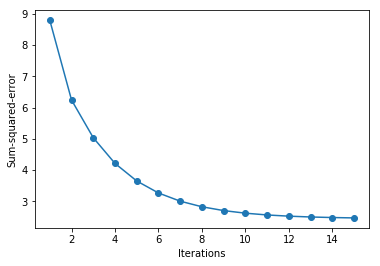

In [10]:
ada = AdalineSGD(epochs=15, lr=0.01)

# shuffle data
np.random.seed(123)
idx = np.random.permutation(len(y))
X_shuffled, y_shuffled =  X_std[idx], y[idx]

# train and adaline and plot decision regions
ada.train(X_shuffled, y_shuffled)
plot_decision_regions(X_shuffled, y_shuffled, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.show()


![](http://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_activation.png)